In [6]:
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from PIL import Image
from io import BytesIO

Analysis based on **LNDB.info - The Light Novel Database** (http://lndb.info)

Code confirmed working on **May 24 2019**

In [17]:
def get_search_url(year,month):
    """LNDB's Light Novel search
    """
    search_url=\
    "http://lndb.info/releases?show=label&target_readership=undefined&only_titles=true&year={}&month={}"\
    .format(year,month)
    return search_url

def get_links_by_url(url):
    """Find all hyperlinks the in the page given by the search url
    """
    base_url="http://lndb.info"
    try:
        res=requests.get(url,timeout=30)
    except:
        print("Page load failed")
        return
    soup = BeautifulSoup(res.text, "html.parser")
    elem_lists=soup.find_all("li",class_="releasebytitle")
    hrefs=[base_url+elem_list.a["href"] for elem_list in elem_lists]
    return hrefs

def count_books_by_yearmonth(year,month):
    """Self-explanatory"""
    return len(get_links_by_url(get_search_url(year,month)))

def count_books_by_year(year):
    """Self-explanatory"""
    total=0
    for month in range(1,13):
        total=total+count_books_by_yearmonth(year,month)
    return total

def get_cover_img(ln_data_url):
    """Get the cover image of a light novel in binary string
    based on the url of the light novel data page
    as given by function get_links_by_url
    """
    base_url="http://lndb.info"
    try:
        res=requests.get(ln_data_url,timeout=30)
    except:
        print("Page load failed")
        return
    soup = BeautifulSoup(res.text, "html.parser")
    img_url=base_url+soup.find("div",class_="left-volume-image").img["src"]
    try:
        res=requests.get(img_url,timeout=30)
    except:
        print("Image download failed")
        return
    return res.content

def show_cover_img(img_bin):
    """Show image based on binary of image retrieved by function get_cover_img"""
    plt.figure(figsize=(10,10))
    with Image.open(BytesIO(img_bin)) as img:
        plt.imshow(img)

In [34]:
count_books_by_yearmonth(2018,4)

47

In [32]:
count_books_by_yearmonth(2018,122)

0

In [35]:
spec_page=requests.get(get_links_by_url(get_search_url(2018,1))[1]).text

In [36]:
soup=BeautifulSoup(spec_page,"html.parser")

In [5]:
get_img_url(get_links_by_url(get_search_url(2018,1))[1])

'http://lndb.info/images/lightnovel/1837/10152.jpeg'

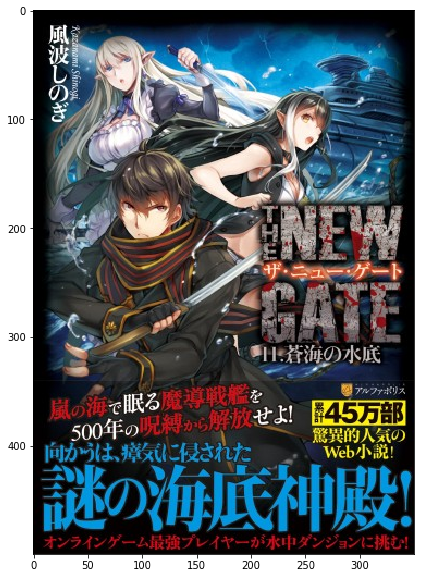

In [19]:
show_cover_img(get_cover_img(get_links_by_url(get_search_url(2018,1))[1]))